In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets, linear_model, preprocessing



In [4]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test.csv")

df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Here we are splitting the label from the pixels
# https://stackoverflow.com/questions/41624241/pandas-split-dataframe-into-two-dataframes
df_train_targets = df_train.iloc[:, 0]
df_train_images = df_train.iloc[:, 1:]
df_test_targets = df_test.iloc[:, 0]
df_test_images = df_test.iloc[:, 1:]

df_train_images.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
# Change the DataFrames into matrices/arrays
X_train = df_train_images.values
y_train = df_train_targets.values
X_test = df_test_images.values
y_test = df_test_targets.values

## Normalizing and Adjusting the Data

In the following sections we will normalize our data from [-1, 1] and shift the values of our label to skip J.

In [7]:
# J and Z do not appear in dataset as they include movement
# shifts labels because of the missing J in the alphabet (value 9)
# Now instead of 0-24 we have 0-23 after removing the value for J
# Note: Z would be in spot 25, but since it never shows, y_train is default 0-24
for i in range(np.shape(y_train)[0]):
    if (y_train[i] > 9):
        y_train[i] -= 1
        
for i in range(np.shape(y_test)[0]):
    if (y_test[i] > 9):
        y_test[i] -= 1

print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [8]:
# Normalize data (From demo_mnist_svm)
X_train = X_train/255.0*2 - 1 # convert to range [-1,1]
X_test = X_test/255.0*2 - 1 # convert to range [-1,1]

## Showing the Dataset

In the following sections we will create an array of characters (A-Y w/o J) corresponding to each label (0-23).
Then we will show what each character looks like in sign language. 

In [9]:
# https://codereview.stackexchange.com/questions/183658/replacing-letters-with-numbers-with-its-position-in-alphabet
# https://docs.python.org/2/library/string.html

alphabet = "ABCDEFGHIKLMNOPQRSTUVWXY"

# function to convert 0-23 number to A-Z character (minus J and Z)
def to_char(num, char = None):
    char = alphabet[num]
    return char

y_tr_char = np.empty((y_train.shape[0], ), dtype = np.str)
for i in range(y_train.shape[0]):
    y_tr_char[i] = to_char(y_train[i])
print(y_tr_char)

y_ts_char = np.empty((y_test.shape[0], ), dtype = np.str)
for i in range(y_test.shape[0]):
    y_ts_char[i] = to_char(y_test[i])
print(y_ts_char)

['D' 'G' 'C' ... 'S' 'R' 'X']
['G' 'F' 'K' ... 'C' 'E' 'C']


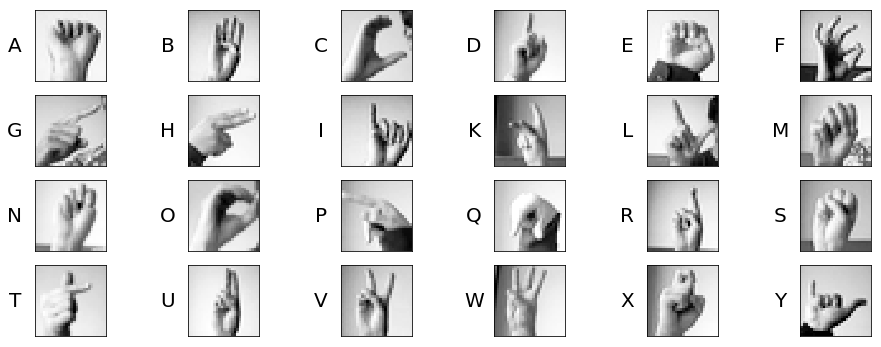

In [11]:
# From demo "demo_mnist_svm" with modifications
# https://stackoverflow.com/questions/27671748/how-to-print-y-axis-label-horizontally-in-a-matplotlib-pylab-chart
def plt_image(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    
Iperm = np.random.permutation(X_train.shape[0])

plt.figure(figsize=(16, 6))
for i in range(24):
    plt.subplot(4,6,i+1)
    j = 0
    while (y_train[j] != (i)): # find a label equal to i
        j += 1
    plt_image(X_train[j])
    # https://matplotlib.org/api/text_api.html#matplotlib.text.Text
    plt.ylabel(y_tr_char[j], rotation = 0, fontsize=20, labelpad=20, verticalalignment = 'center')
    
# plt.figure(figsize=(15, 4))
# for i in range(nplt):        
#     plt.subplot(1,nplt,i+1)        
#     ind = Iperm[i]    
#     plt_digit(X_test[ind,:]) 
#     title = "true=" + to_char(y_test[ind]) + " est=" + to_char(yhat_logreg[ind])
#     plt.title(title)

## Logistic Regression

In the following section we see how well we can fit the data using Logistic Regression. This section is taken direcly from "demo_mnist_svm".

In [12]:
logreg = linear_model.LogisticRegression(verbose=1, multi_class='multinomial', 
                                         solver='lbfgs', max_iter=500)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [13]:
yhat_logreg = logreg.predict(X_test)
acc_logreg = np.mean(yhat_logreg == y_test)
print('Accuracy = {0:f}'.format(acc_logreg))

Accuracy = 0.686977


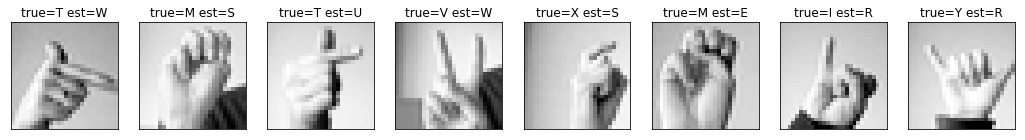

In [15]:
# Here we show what the data got wrong 

nplt = 8
Ierr = np.where(y_test != yhat_logreg)[0]

Iperm = np.random.permutation(Ierr)

plt.figure(figsize=(18, 5))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Iperm[i]    
    plt_image(X_test[ind,:]) 
    title = "true=" + to_char(y_test[ind]) + " est=" + to_char(yhat_logreg[ind])
    plt.title(title)

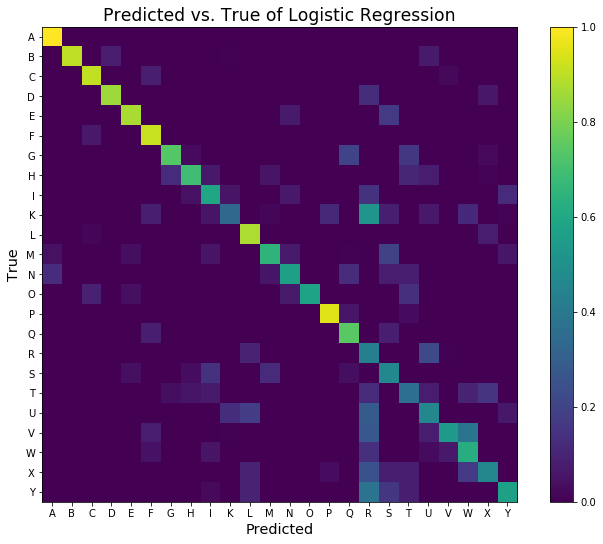

In [22]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test,yhat_logreg)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.4, top=0.95)
plt.imshow(C, interpolation='none')
plt.xlabel("Predicted", fontsize= 'x-large')
plt.ylabel("True", fontsize= 'x-large')
plt.title("Predicted vs. True of Logistic Regression", fontsize= 'xx-large')
plt.xticks(np.arange(24), alphabet)
plt.yticks(np.arange(24), alphabet)
plt.colorbar()

## SVC

In the following section we see how well we can fit the data using SVC. This section is taken direcly from "demo_mnist_svm".

In [17]:
from sklearn import svm
# Create a classifier: a support vector classifier with linear kernel
svc = svm.SVC(probability=False, kernel="linear", verbose=1)
svc.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)

In [25]:
yhat_svc = svc.predict(X_test)
acc_svc = np.mean(yhat_svc == y_test)
print('Accuracy = {0:f}'.format(acc_svc))

Accuracy = 0.781651


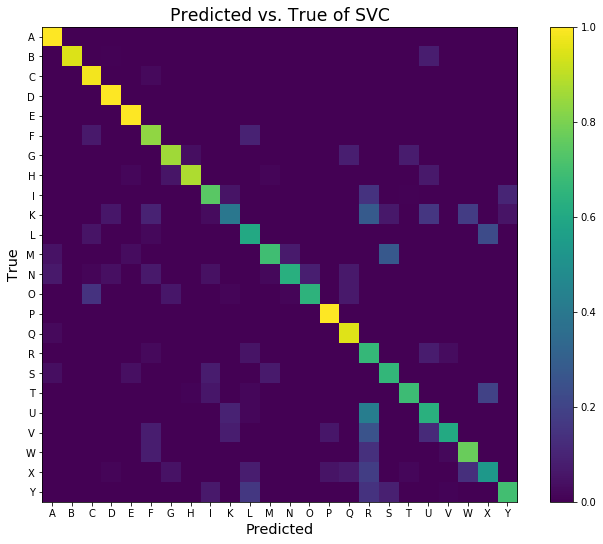

In [26]:
C = confusion_matrix(y_test,yhat_svc)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.4, top=0.95)
plt.imshow(C, interpolation='none')
plt.xlabel("Predicted", fontsize= 'x-large')
plt.ylabel("True", fontsize= 'x-large')
plt.title("Predicted vs. True of SVC", fontsize= 'xx-large')
plt.xticks(np.arange(24), alphabet)
plt.yticks(np.arange(24), alphabet)
plt.colorbar()

## Finding C and Gamma for SVM

The following sections were used to find the optimal C and Gamma for SVM 'rbf'. This method was found on sklearn. We used StratifiedShuffleSplit which acted similar to K-Fold. We also used a smaller set of the data as this took a long time. 

We do not suggest running this code, you can skip to the SVM section.

In [29]:
X_train_subset = X_train[0:5000]
y_train_subset = y_train[0:5000]

In [ ]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2,2,5)
gamma_range = np.logspace(-2,2,5)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv)
grid.fit(X_train_subset, y_train_subset)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# https://matplotlib.org/tutorials/colors/colormaps.html
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.8, midpoint=0.99))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [ ]:
print(scores)

## SVM

In the following section we see how well we can fit the data using SVM. This section is taken direcly from "demo_mnist_svm".

In [27]:
# Create a classifier: a support vector classifier with RBF kernel
svmrbf = svm.SVC(probability=False, kernel="rbf", C=100, gamma=1e-7, verbose=1)
svmrbf.fit(X_train,y_train)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [28]:
yhat_svm = svmrbf.predict(X_test)
acc_svm = np.mean(yhat_svm == y_test)
print('Accuracy = {0:f}'.format(acc_svm))
# Accuracy before normalization = 0.815254
# Accuracy after normalization  = 0.781651

Accuracy = 0.103876


In [ ]:
C = confusion_matrix(y_test,yhat_svm)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
plt.figure(figsize=(12, 12))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.4, top=0.95)
plt.imshow(C, interpolation='none')
plt.xlabel("Predicted", fontsize= 'x-large')
plt.ylabel("True", fontsize= 'x-large')
plt.title("Predicted vs. True of SVM RBF", fontsize= 'xx-large')
plt.xticks(np.arange(24), alphabet)
plt.yticks(np.arange(24), alphabet)
plt.colorbar()

In [ ]:
# Basic Neural Network from MNIST Neural Network Demo

import torch
import torch.utils.data
import torch.nn as nn

batch_size = 240

# Convert the numpy arrays to PyTorch tensors
Xtr_torch = torch.Tensor(X_train)
ytr_torch = torch.Tensor(y_train)
Xts_torch = torch.Tensor(X_test)
yts_torch = torch.Tensor(y_test)

# Create a training Dataset
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
# Creates a training DataLoader from this Dataset
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True) 

# Create a testing Dataset
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
# Creates a testing DataLoader from this Dataset
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size)

In [ ]:
nin = X_train.shape[1] # dimension of input data
nh = 240 # number of hidden units
nout = int(np.max(y_train)+1) # number of outputs = 10 since there are 10 classes

class Net(nn.Module):
    def __init__(self,nin,nh,nout):
        super(Net,self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.Dense1 = nn.Linear(nin,nh)
        self.Dense2 = nn.Linear(nh,nout)
        
    def forward(self,x):
        x = self.sigmoid(self.Dense1(x))
        out = self.Dense2(x)
        return out

model = Net(nin=nin, nh=nh, nout=nout)

In [ ]:
import torch.optim as optim

# if lr = .001 too high
# if lr = .0001 then accuracy 62.69 after 50 epochs
# if lr = .000075 then accuracy 67.5 after 50 epochs
# if lr = .00005 then accuracy 70.69 after 50 epochs
# if lr = .0000375 then accuracy 67.44 after 50 epochs
# if lr = .000025 then accuracy 69.3 after 50 epochs
# if lr = .00001 then accuracy 59.98 after 50 epochs
opt = optim.Adam(model.parameters(), lr= 0.00005)

criterion = nn.CrossEntropyLoss()

In [ ]:
num_epoch = 100

a_tr_loss = np.zeros([num_epoch])
a_tr_accuracy = np.zeros([num_epoch])
a_ts_loss = np.zeros([num_epoch])
a_ts_accuracy = np.zeros([num_epoch])

for epoch in range(num_epoch):

    model.train() # put model in training mode
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    batch_loss = []
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        batch_loss.append(loss.item())
        # Compute gradients using back propagation
        opt.zero_grad()
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        # Do hard classification: index of largest score
        _, predicted = torch.max(out.data, 1)
        # Compute number of decision errors
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        
    tr_accuracy = 100*correct/total # Compute accuracy over epoch
    a_tr_loss[epoch] = np.mean(batch_loss) # Compute average loss over epoch
    a_tr_accuracy[epoch] = 100*correct/total

    model.eval() # put model in evaluation mode
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    batch_loss = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            batch_loss.append(criterion(outputs,labels).item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    a_ts_loss[epoch] = np.mean(batch_loss)
    a_ts_accuracy[epoch] = 100*correct/total
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Loss: {1:.3f}   '.format(epoch+1, a_tr_loss[epoch])
          +'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[epoch], a_ts_loss[epoch])
          +'Test Accuracy: {0:.2f}'.format(a_ts_accuracy[epoch]))
        

In [ ]:
plt.plot(a_tr_accuracy)
plt.plot(a_ts_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'test accuracy'])

In [ ]:
X_train = df_train_images.values
y_train = df_train_targets.values
X_test = df_test_images.values
y_test = df_test_targets.values

# shifts labels because of the missing J in the alphabet (value 9)
for i in range(np.shape(y_train)[0]):
    if (y_train[i] > 9):
        y_train[i] -= 1
        
for i in range(np.shape(y_test)[0]):
    if (y_test[i] > 9):
        y_test[i] -= 1

# Normalize data from [-1, 1]
X_train = (X_train/255)*2 - 1
X_test = (X_test/255)*2 - 1

nrow = 28
ncol = 28

Xtr_box = np.zeros((X_train.shape[0],nrow,ncol))
for i in range(np.shape(X_train)[0]):
    Xtr_box[i] = X_train[i].reshape((nrow,ncol))

Xts_box =  np.zeros((X_test.shape[0],nrow,ncol))
for i in range(np.shape(X_test)[0]):
    Xts_box[i] = X_test[i].reshape((nrow,ncol))

In [ ]:
print(Xts_box.shape)
plt.imshow(Xts_box[2],  cmap='Greys_r')
plt.xticks([])
plt.yticks([])
print(y_test[2])

In [ ]:
nchan_in = 1       # number of input channels = 1 since it is a greyscale image
reshape_tr = (Xtr_box.shape[0],nchan_in,nrow,ncol)
reshape_ts = (Xts_box.shape[0],nchan_in,nrow,ncol)

Xtr = Xtr_box.reshape(reshape_tr)
Xts = Xts_box.reshape(reshape_ts)

In [ ]:
print(Xts.shape)

In [ ]:
# https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/

import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim

batch_size = 64

# Convert the numpy arrays to PyTorch tensors
Xtr_torch = torch.Tensor(Xtr)
ytr_torch = torch.Tensor(y_train)
Xts_torch = torch.Tensor(Xts)
yts_torch = torch.Tensor(y_test)

# Create a training Dataset
train_ds = torch.utils.data.TensorDataset(Xtr_torch, ytr_torch)
# Creates a training DataLoader from this Dataset
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True) 

# Create a testing Dataset
test_ds = torch.utils.data.TensorDataset(Xts_torch, yts_torch)
# Creates a testing DataLoader from this Dataset
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size)

In [ ]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        # outputs 16 channels of 14x14
        
        self.conv2 = nn.Conv2d(16,16,3,padding=1)
        # outputs 16 channels of 7x7
        
        self.fc1 = nn.Linear(16*7*7, 392) #392 is 784/2
        self.fc2 = nn.Linear(392, num_classes)
        
    def forward(self,x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0),-1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BasicCNN()

In [ ]:
epochs = 20
lrate = .05
# with lr .05 = 93.6
decay = lrate/epochs

In [ ]:
# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))

In [ ]:
basic_tr_accuracy = []
basic_ts_accuracy = []

for epoch in range(epochs):
    # Take scheduler step
    scheduler.step()
    
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    model.train() # put model in training mode
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        # Zero gradients
        opt.zero_grad()
        # Compute gradients using back propagation
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        
        # Compute Accuracy
        _, predicted = torch.max(out.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        

    basic_tr_accuracy.append( 100*correct/total )
    
    correct = 0
    total = 0
    model.eval() # put model in evaluation mode
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    basic_ts_accuracy.append( 100*correct/total )
    
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Accuracy: {1:.3f}%   Test Accuracy: {2:.3f}%'.format(epoch+1, basic_tr_accuracy[epoch], basic_ts_accuracy[epoch]))
        

print('Done!')

In [ ]:
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,16,3,padding=1)
        self.bn2 = nn.BatchNorm1d(16*7**2)
        self.fc1 = nn.Linear(16*7**2, 392)
        self.bn3 = nn.BatchNorm1d(392)
        self.fc2 = nn.Linear(392, num_classes)
        
    def forward(self,x):
        x = self.bn1(self.pool(self.relu(self.conv1(x))))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.bn2(x.view(x.size(0),-1))
        x = self.bn3(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


model = BNNet()


# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))

In [ ]:
basic_tr_accuracy = []
basic_ts_accuracy = []

for epoch in range(epochs):
    # Take scheduler step
    scheduler.step()
    
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    model.train() # put model in training mode
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        # Zero gradients
        opt.zero_grad()
        # Compute gradients using back propagation
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        
        # Compute Accuracy
        _, predicted = torch.max(out.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        

    basic_tr_accuracy.append( 100*correct/total )
    
    correct = 0
    total = 0
    model.eval() # put model in evaluation mode
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    basic_ts_accuracy.append( 100*correct/total )
    
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Accuracy: {1:.3f}%   Test Accuracy: {2:.3f}%'.format(epoch+1, basic_tr_accuracy[epoch], basic_ts_accuracy[epoch]))
        

print('Done!')

In [ ]:
# network with dropout and BN
class DropoutNet(nn.Module):
    def __init__(self):
        super(DropoutNet, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1,16,3,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.bn1 = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout2d(p=0.25)
        self.conv2 = nn.Conv2d(16,16,3,padding=1)
        self.bn2 = nn.BatchNorm1d(16*7**2)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(16*7**2, 392)
        self.bn3 = nn.BatchNorm1d(392)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(392, num_classes)
        
    def forward(self,x):
        x = self.dropout1(self.bn1(self.pool(self.relu(self.conv1(x)))))
        #x = self.bn1(self.pool(self.relu(self.conv1(x))))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.dropout2(self.bn2(x.view(x.size(0),-1)))
        x = self.dropout3(self.bn3(self.relu(self.fc1(x))))
        x = self.fc2(x)
        return x

model = DropoutNet()

# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))

In [ ]:
basic_tr_accuracy = []
basic_ts_accuracy = []

for epoch in range(epochs):
    # Take scheduler step
    scheduler.step()
    
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    model.train() # put model in training mode
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        # Zero gradients
        opt.zero_grad()
        # Compute gradients using back propagation
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        
        # Compute Accuracy
        _, predicted = torch.max(out.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        

    basic_tr_accuracy.append( 100*correct/total )
    
    correct = 0
    total = 0
    model.eval() # put model in evaluation mode
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    basic_ts_accuracy.append( 100*correct/total )
    
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Accuracy: {1:.3f}%   Test Accuracy: {2:.3f}%'.format(epoch+1, basic_tr_accuracy[epoch], basic_ts_accuracy[epoch]))
        

print('Done!')

In [ ]:
# network with dropout and BN
class DropoutNet(nn.Module):
    def __init__(self):
        super(DropoutNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(1,32,5,padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout2d(p=0.25)
        self.conv2 = nn.Conv2d(32,24,4,padding=1)
        self.bn2 = nn.BatchNorm2d(24)
        self.dropout2 = nn.Dropout2d(p=0.25)
        self.conv3 = nn.Conv2d(24,16,3,padding=1)
        self.bn3 = nn.BatchNorm1d(864)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(864, 432)
        self.bn4 = nn.BatchNorm1d(432)
        self.dropout4 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(432, num_classes)
        
    def forward(self,x):
        #x = self.dropout1(self.bn1(self.pool(self.relu(self.conv1(x)))))
        x = self.bn1(self.pool(self.relu(self.conv1(x))))
        X = self.dropout2(self.bn2(self.pool(self.relu(self.conv2(x)))))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.dropout2(self.bn2(x.view(x.size(0),-1)))
        x = self.dropout3(self.bn3(self.relu(self.fc1(x))))
        x = self.fc2(x)
        return x

model = DropoutNet()

# initiate Adam optimizer
opt = optim.Adam(model.parameters(), lr=lrate)

# Create learning rate scheduler
lambda1 = lambda epoch: lrate - decay*epoch
scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=lambda1)

# initiate loss function
criterion = nn.CrossEntropyLoss()

print(str(model))

In [ ]:
basic_tr_accuracy = []
basic_ts_accuracy = []

for epoch in range(epochs):
    # Take scheduler step
    scheduler.step()
    
    correct = 0 # initialize error counter
    total = 0 # initialize total counter
    model.train() # put model in training mode
    # iterate over training set
    for train_iter, data in enumerate(train_loader):
        x_batch,y_batch = data
        y_batch = y_batch.type(torch.long)
        out = model(x_batch)
        # Compute Loss
        loss = criterion(out,y_batch)
        # Zero gradients
        opt.zero_grad()
        # Compute gradients using back propagation
        loss.backward()
        # Take an optimization 'step'
        opt.step()
        
        # Compute Accuracy
        _, predicted = torch.max(out.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        

    basic_tr_accuracy.append( 100*correct/total )
    
    correct = 0
    total = 0
    model.eval() # put model in evaluation mode
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            labels = labels.type(torch.long)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    basic_ts_accuracy.append( 100*correct/total )
    
    # Print details every print_mod epoch
    print('Epoch: {0:2d}   Train Accuracy: {1:.3f}%   Test Accuracy: {2:.3f}%'.format(epoch+1, basic_tr_accuracy[epoch], basic_ts_accuracy[epoch]))
        

print('Done!')